In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sursaud-corona-quot-dep-2020-12-12-19h20.csv', sep=";")
# rad: retour a domicile
df_hosp = pd.read_csv('donnees-hospitalieres-covid19-2020-12-12-19h03.csv', sep=";")

d:\programmeerik\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
df

,dep,date_de_passage,sursaud_cl_age_corona,nbre_pass_corona,nbre_pass_tot,nbre_hospit_corona,nbre_pass_corona_h,nbre_pass_corona_f,nbre_pass_tot_h,nbre_pass_tot_f,nbre_hospit_corona_h,nbre_hospit_corona_f,nbre_acte_corona,nbre_acte_tot,nbre_acte_corona_h,nbre_acte_corona_f,nbre_acte_tot_h,nbre_acte_tot_f
0,1,2020-02-24,0,0.0,357.0,0.0,0.0,0.0,202.0,155.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-02-24,A,0.0,73.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-02-24,B,0.0,155.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-02-24,C,0.0,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2020-02-24,D,0.0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176947,976,2020-12-11,A,0.0,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176948,976,2020-12-11,B,0.0,51.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176949,976,2020-12-11,C,0.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176950,976,2020-12-11,D,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df31 = df[df['dep'] == '31'].groupby('date_de_passage').sum()['nbre_hospit_corona']
df_hosp31 = df_hosp[df_hosp['dep'] == '31'].groupby('jour').sum()['hosp']

dftot = df.groupby('date_de_passage').sum()['nbre_hospit_corona']

Index(['2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       ...
       '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
       '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11'],
      dtype='object', name='date_de_passage', length=292)


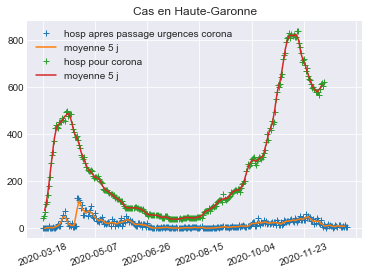

In [10]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    
    # select only data in the range of this DataFrame
    idx = df31.index
    
    print(idx)
    
    #df31.cumsum().plot(marker='+', linestyle='', label='cas cumulés', ax=ax)
    df31[idx].plot(marker='+', linestyle='', label='hosp apres passage urgences corona', ax=ax)
    df31[idx].rolling(5, center=True).mean().plot(label='moyenne 5 j', ax=ax)

    df_hosp31.plot(marker='+', linestyle='', label='hosp pour corona', ax=ax)
    df_hosp31.rolling(5, center=True).mean().plot(label='moyenne 5 j', ax=ax)

    ax.set_xlabel('')

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)

    plt.grid()
    plt.legend()
    plt.title('Cas en Haute-Garonne')
    plt.savefig('covid31.png', dpi=150, bbox_inches='tight')
    plt.show()

In [20]:
pop = np.loadtxt('pop_insee_1erjan2020.txt', dtype=float)
poptot = sum(pop)
dep_list = np.loadtxt('dep.txt', dtype=str)
dep_nom = []
with open('dep_nom.txt', 'r') as f:
    dep_nom = [line[:-1] for line in f]
pop = dict(zip(dep_list, pop))
dep_nom = dict(zip(dep_list, dep_nom))

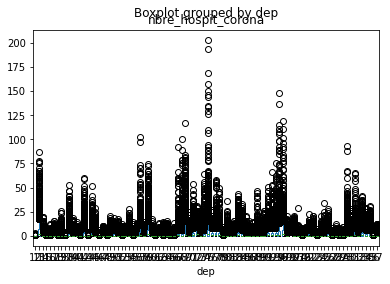

In [21]:
# average over last dates, per dep
#data = df.set_index('date_de_passage').loc['2020-12-03':].groupby('dep').mean()
data = df.loc['2020-12-03':]
data.boxplot(column='nbre_hospit_corona', by='dep', grid=False)
plt.show()

In [28]:
data.index

Index([  12,   13,   14,   15,   16,   17,   18,   19,   37,   38,   39,   40,
         41,   42,   43,   44,   45,   46,   47,   48,   49,   50,   51,   52,
         53,   54,   55,   56,   57,   58,   59,   60,   61,   62,   63,   64,
         65,   66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,  971,  972,  973,  974,  976,
       '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B',
       '30', '31', '32', '33', '34', '35', '36', '37'],
      dtype='object', name='dep')

['12', '13', '14', '15', '16', '17', '18', '19', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973', '974', '976', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32', '33', '34', '35', '36', '37']


<ipython-input-30-61e66a3b891b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


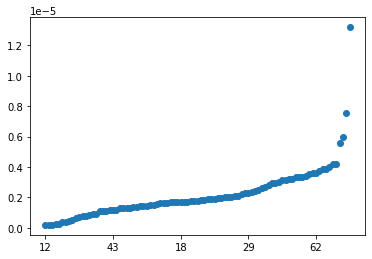

In [30]:
# average over last dates, per dep
data = df.loc['2020-12-03':].groupby('dep').mean()

dataIndex = []
for i in data.index:
    dataIndex.append(str(i))
print(dataIndex)
    
#print(pop)
#print(data.index)
pop_per_dep = np.array([pop[dep] for dep in dataIndex])

data['frac_hospit_corona'] = data['nbre_hospit_corona']/pop_per_dep

deps = data.index.values
values = data['frac_hospit_corona'].values
o = np.argsort(values)
labels = deps[o]
values = values[o]

fig, ax = plt.subplots()
plt.plot(values, 'o')
ax.set_xticklabels(labels)

plt.show()

In [51]:
df[df['dep'] == 1]

,dep,date_de_passage,sursaud_cl_age_corona,nbre_pass_corona,nbre_pass_tot,nbre_hospit_corona,nbre_pass_corona_h,nbre_pass_corona_f,nbre_pass_tot_h,nbre_pass_tot_f,nbre_hospit_corona_h,nbre_hospit_corona_f,nbre_acte_corona,nbre_acte_tot,nbre_acte_corona_h,nbre_acte_corona_f,nbre_acte_tot_h,nbre_acte_tot_f
0,1,2020-02-24,0,0.0,357.0,0.0,0.0,0.0,202.0,155.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-02-24,A,0.0,73.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-02-24,B,0.0,155.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-02-24,C,0.0,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2020-02-24,D,0.0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1,2020-12-11,A,0.0,35.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,1,2020-12-11,B,2.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749,1,2020-12-11,C,1.0,43.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750,1,2020-12-11,D,1.0,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


KeyError: 1

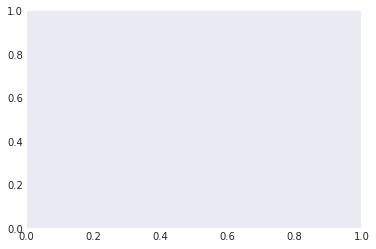

In [53]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    low_dep = []
    for dep in df['dep'].unique():
        cdf = df[df['dep'] == dep].groupby('date_de_passage').sum()['nbre_hospit_corona']
        # average derivative last days
        Nnew = cdf.iloc[-5:].mean()
        # index of first case
        ifirst = np.argmax(cdf.values)
        if 0 < Nnew/pop[dep] < 20*1e-6 and ifirst < 22:
            low_dep.append(dep)
            (100 * cdf.cumsum()/pop[dep]).plot(marker='+', linestyle='', label=f'{dep_nom[dep]}', ax=ax)

            
    # add tot for France
    (100 * dftot.cumsum()/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)

    ax.set_ylabel('$\%$ pop')    
    ax.set_xlabel('')
    plt.legend()

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)
    
    plt.grid()
    plt.title('Cas cumulés')
    plt.savefig('coviddep.png', dpi=150, bbox_inches='tight')

    plt.show()

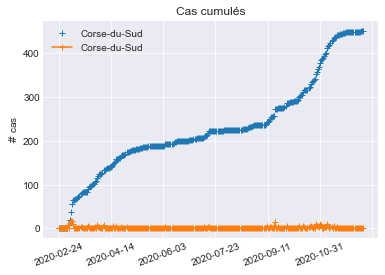

In [54]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    low_dep = []
    for dep in ['2A']: #, '974']:
        cdf = df[df['dep'] == dep].groupby('date_de_passage').sum()['nbre_hospit_corona']
        # average derivative last days
        Nnew = cdf.iloc[-5:].mean()
        cdf.cumsum().plot(marker='+', linestyle='', label=f'{dep_nom[dep]}', ax=ax)
        cdf.plot(marker='+', linestyle=None, label=f'{dep_nom[dep]}', ax=ax)
            
    # add tot for France
    #(100 * dftot.cumsum()/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)

    ax.set_ylabel('$\#$ cas')    
    ax.set_xlabel('')
    plt.legend()

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)
    
    plt.grid()
    plt.title('Cas cumulés')
    plt.savefig('covid_ex.png', dpi=150, bbox_inches='tight')

    plt.show()

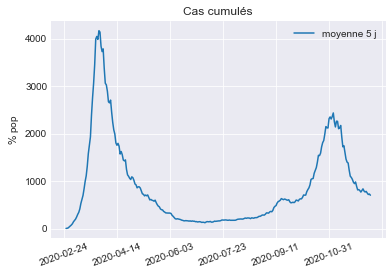

In [55]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    low_dep = []
            
    # add tot for France
    #(100 * dftot.cumsum()/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)
    #(100 * dftot/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)
    #(100 * dftot/poptot).rolling(5, center=True).mean().plot(label='moyenne 5 j', ax=ax)
    (dftot).rolling(5, center=True).mean().plot(label='moyenne 5 j', ax=ax)

    ax.set_ylabel('$\%$ pop')    
    ax.set_xlabel('')
    plt.legend()

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)
        
    #ax.set_yscale('log')
    
    plt.grid()
    plt.title('Cas cumulés')
    plt.savefig('covid_ex.png', dpi=150, bbox_inches='tight')

    plt.show()